# Indicador de diabetes

## O código apresentado é utilizado para comparar diversos métodos de modelos de decisão e técnicas gerais de aprendizado de máquina.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

### Carregar os dados

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

### Separar as variáveis independentes (X) e a variável dependente (y)

In [3]:
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

### Remoção de valores ausentes

In [4]:
X.fillna(X.mean(), inplace=True)

### Dividir os dados em conjuntos de treino e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Esta primeira parte será executada utilizando a técnica de undersampling

### Aplicar undersampling

In [6]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

### Treinar o modelo Random Forest com os dados balanceados

In [7]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

### Treinar outro modelo para comparação, por exemplo, Decision Tree

In [8]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

### Treinar o modelo XGBoost com os dados balanceados

In [9]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Treinar o modelo SVM com os dados balanceados

In [10]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_resampled, y_resampled)

SVC(random_state=42)

### Avaliar os modelos usando Shuffle Split

In [11]:
# Definir o número de iterações e a proporção do conjunto de teste
n_splits = 10
test_size = 0.3

# Instanciar o Shuffle Split
ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=69)

# Avaliar o modelo Random Forest com Shuffle Split
rf_ss_scores = cross_val_score(rf_clf, X_resampled, y_resampled, cv=ss)
dt_ss_scores = cross_val_score(dt_clf, X_resampled, y_resampled, cv=ss)
xgb_ss_scores = cross_val_score(xgb_clf, X_resampled, y_resampled, cv=ss)
svm_ss_scores = cross_val_score(svm_clf, X_resampled, y_resampled, cv=ss)

# Imprimir a acurácia média do Random Forest com Shuffle Split
print(f'Acurácia média do Random Forest (Shuffle Split): {rf_ss_scores.mean():.2f}')
print(f'Acurácia média do Decision Tree (Shuffle Split): {dt_ss_scores.mean():.2f}')
print(f'Acurácia média do XGBoost (Shuffle Split): {xgb_ss_scores.mean():.2f}')
print(f'Acurácia média do SVM (Shuffle Split): {svm_ss_scores.mean():.2f}')

Acurácia média do Random Forest (Shuffle Split): 0.81
Acurácia média do Decision Tree (Shuffle Split): 0.67
Acurácia média do XGBoost (Shuffle Split): 0.81
Acurácia média do SVM (Shuffle Split): 0.80


### Avaliar os modelos usando k-fold cross-validation

In [12]:
k=5
rf_cv_scores = cross_val_score(rf_clf, X_resampled, y_resampled, cv=k)
dt_cv_scores = cross_val_score(dt_clf, X_resampled, y_resampled, cv=k)
xgb_cv_scores = cross_val_score(xgb_clf, X_resampled, y_resampled, cv=k)
svm_cv_scores = cross_val_score(svm_clf, X_resampled, y_resampled, cv=k)

print(f'Acurácia média do Random Forest (k-fold CV): {rf_cv_scores.mean():.2f}')
print(f'Acurácia média do Decision Tree (k-fold CV): {dt_cv_scores.mean():.2f}')
print(f'Acurácia média do XGBoost (k-fold CV): {xgb_cv_scores.mean():.2f}')
print(f'Acurácia média do SVM (k-fold CV): {svm_cv_scores.mean():.2f}')

Acurácia média do Random Forest (k-fold CV): 0.81
Acurácia média do Decision Tree (k-fold CV): 0.67
Acurácia média do XGBoost (k-fold CV): 0.81
Acurácia média do SVM (k-fold CV): 0.80


### Fazer previsões usando os modelos, calcular as métricas e imprimir-las

In [13]:
# Fazer previsões usando os modelos
rf_predictions = rf_clf.predict(X_test)
dt_predictions = dt_clf.predict(X_test)
xgb_predictions = xgb_clf.predict(X_test)
svm_predictions = svm_clf.predict(X_test)

# Calcular as métricas para cada modelo
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, rf_predictions, average='weighted', zero_division=1)
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(y_test, dt_predictions, average='weighted', zero_division=1)
xgb_precision, xgb_recall, xgb_f1, _ = precision_recall_fscore_support(y_test, xgb_predictions, average='weighted', zero_division=1)
svm_precision, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_test, svm_predictions, average='weighted', zero_division=1)

# Imprimir as métricas para cada modelo
print(f'Modelo Decision Tree: Precisão={rf_precision:.2f}, Recall={rf_recall:.2f}, F1-score={rf_f1:.2f}')
print(f'Modelo Decision Tree: Precisão={dt_precision:.2f}, Recall={dt_recall:.2f}, F1-score={dt_f1:.2f}')
print(f'Modelo XGBoost: Precisão={xgb_precision:.2f}, Recall={xgb_recall:.2f}, F1-score={xgb_f1:.2f}')
print(f'Modelo SVM: Precisão={svm_precision:.2f}, Recall={svm_recall:.2f}, F1-score={svm_f1:.2f}')

Modelo Decision Tree: Precisão=0.86, Recall=0.37, F1-score=0.41
Modelo Decision Tree: Precisão=0.83, Recall=0.38, F1-score=0.45
Modelo XGBoost: Precisão=0.86, Recall=0.39, F1-score=0.43
Modelo SVM: Precisão=0.87, Recall=0.17, F1-score=0.09


### Gráfico comparando acurácia entre os métodos K-fold e Shufle Split (SS)

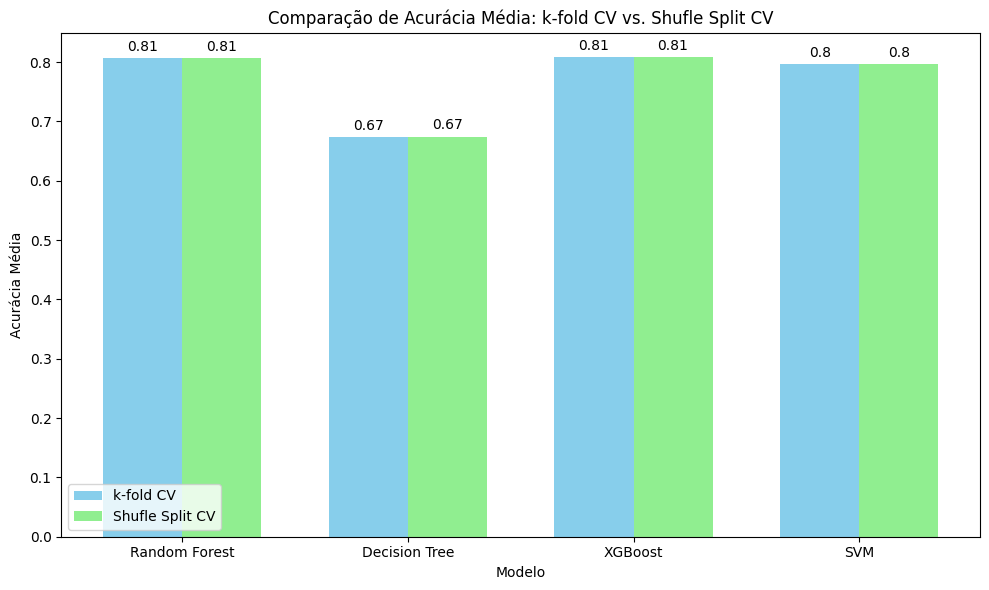

In [14]:
kfold_accuracies = [rf_cv_scores.mean(), dt_cv_scores.mean(), xgb_cv_scores.mean(), svm_cv_scores.mean()]
ss_accuracies = [rf_ss_scores.mean(), dt_ss_scores.mean(), xgb_ss_scores.mean(), svm_ss_scores.mean()]
labels = ['Random Forest', 'Decision Tree', 'XGBoost', 'SVM']

x = np.arange(len(labels))  # localização dos labels no eixo x
width = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, kfold_accuracies, width, label='k-fold CV', color='skyblue')
rects2 = ax.bar(x + width/2, ss_accuracies, width, label='Shufle Split CV', color='lightgreen')

# Adicionar rótulos, título e legendas personalizadas
ax.set_xlabel('Modelo')
ax.set_ylabel('Acurácia Média')
ax.set_title('Comparação de Acurácia Média: k-fold CV vs. Shufle Split CV')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Função para adicionar rótulos de dados em cima das barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # deslocamento vertical dos rótulos
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

### Gráfico que compara métricas (f1, recall, accuracies)

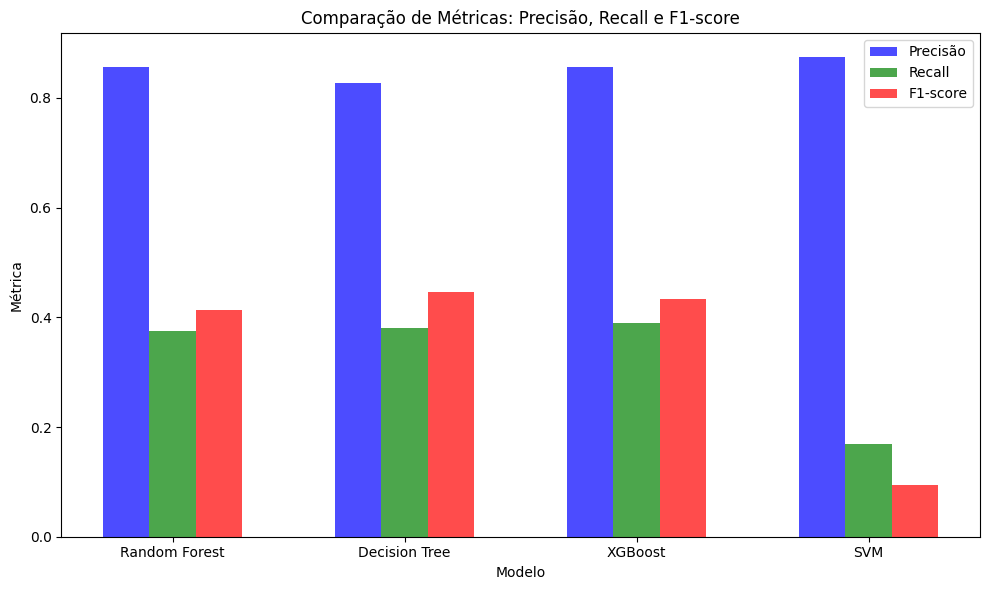

In [15]:
accuracies = [rf_precision, dt_precision, xgb_precision, svm_precision]
recalls = [rf_recall, dt_recall, xgb_recall, svm_recall]
f1_scores = [rf_f1, dt_f1, xgb_f1, svm_f1]
labels = ['Random Forest', 'Decision Tree', 'XGBoost', 'SVM']

# Configurações do gráfico
x = np.arange(len(labels))
width = 0.2

# Criar as barras
plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracies, width, label='Precisão', color='b', alpha=0.7)
plt.bar(x, recalls, width, label='Recall', color='g', alpha=0.7)
plt.bar(x + width, f1_scores, width, label='F1-score', color='r', alpha=0.7)

# Configurar eixos e rótulos
plt.xlabel('Modelo')
plt.ylabel('Métrica')
plt.title('Comparação de Métricas: Precisão, Recall e F1-score')
plt.xticks(x, labels)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Esta parte será executada utilizando a técnica SMOTE (Synthetic Minority Over-sampling Technique)

### Instanciar o SMOTE

In [16]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### Treinar o modelo Random Forest com os dados balanceados

In [17]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

### Treinar outro modelo para comparação, por exemplo, Decision Tree

In [18]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

### Treinar o modelo XGBoost com os dados balanceados

In [19]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Treinar o modelo SVM com os dados balanceados

In [20]:
#svm_clf = SVC(random_state=42)
#svm_clf.fit(X_resampled, y_resampled)

### Avaliar e imprimir os modelos com Shuffle Split

In [21]:
rf_ss_scores = cross_val_score(rf_clf, X_resampled, y_resampled, cv=ss)
dt_ss_scores = cross_val_score(dt_clf, X_resampled, y_resampled, cv=ss)
xgb_ss_scores = cross_val_score(xgb_clf, X_resampled, y_resampled, cv=ss)
#svm_ss_scores = cross_val_score(svm_clf, X_resampled, y_resampled, cv=ss)

print(f'Acurácia média do Random Forest (Shuffle Split): {rf_ss_scores.mean():.2f}')
print(f'Acurácia média do Decision Tree (Shuffle Split): {dt_ss_scores.mean():.2f}')
print(f'Acurácia média do XGBoost (Shuffle Split): {xgb_ss_scores.mean():.2f}')
#print(f'Acurácia média do SVM (Shuffle Split): {svm_ss_scores.mean():.2f}')

Acurácia média do Random Forest (Shuffle Split): 0.93
Acurácia média do Decision Tree (Shuffle Split): 0.86
Acurácia média do XGBoost (Shuffle Split): 0.85


### Avaliar os modelos usando k-fold cross-validation

In [22]:
k=5
rf_cv_scores = cross_val_score(rf_clf, X_resampled, y_resampled, cv=k)
dt_cv_scores = cross_val_score(dt_clf, X_resampled, y_resampled, cv=k)
xgb_cv_scores = cross_val_score(xgb_clf, X_resampled, y_resampled, cv=k)
#svm_ss_scores = cross_val_score(svm_clf, X_resampled, y_resampled, cv=k)

print(f'Acurácia média do Random Forest (k-fold CV): {rf_cv_scores.mean():.2f}')
print(f'Acurácia média do Decision Tree (k-fold CV): {dt_cv_scores.mean():.2f}')
print(f'Acurácia média do XGBoost (k-fold CV): {xgb_cv_scores.mean():.2f}')
#print(f'Acurácia média do SVM (k-fold CV): {svm_cv_scores.mean():.2f}')

Acurácia média do Random Forest (k-fold CV): 0.92
Acurácia média do Decision Tree (k-fold CV): 0.86
Acurácia média do XGBoost (k-fold CV): 0.83


### Fazer previsões usando os modelos

In [23]:
rf_predictions = rf_clf.predict(X_test)
dt_predictions = dt_clf.predict(X_test)
xgb_predictions = xgb_clf.predict(X_test)
#svm_predictions = svm_clf.predict(X_test)

# Calcular as métricas para cada modelo
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, rf_predictions, average='weighted', zero_division=1)
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(y_test, dt_predictions, average='weighted', zero_division=1)
xgb_precision, xgb_recall, xgb_f1, _ = precision_recall_fscore_support(y_test, xgb_predictions, average='weighted', zero_division=1)
#svm_precision, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_test, svm_predictions, average='weighted', zero_division=1)

# Imprimir as métricas para cada modelo
print(f'Modelo Decision Tree: Precisão={rf_precision:.2f}, Recall={rf_recall:.2f}, F1-score={rf_f1:.2f}')
print(f'Modelo Decision Tree: Precisão={dt_precision:.2f}, Recall={dt_recall:.2f}, F1-score={dt_f1:.2f}')
print(f'Modelo XGBoost: Precisão={xgb_precision:.2f}, Recall={xgb_recall:.2f}, F1-score={xgb_f1:.2f}')
#print(f'Modelo SVM: Precisão={svm_precision:.2f}, Recall={svm_recall:.2f}, F1-score={svm_f1:.2f}')

Modelo Decision Tree: Precisão=0.79, Recall=0.84, F1-score=0.81
Modelo Decision Tree: Precisão=0.78, Recall=0.77, F1-score=0.77
Modelo XGBoost: Precisão=0.82, Recall=0.85, F1-score=0.82


### Gráfico comparando acurácia entre os métodos K-fold e Shufle Split (SS)

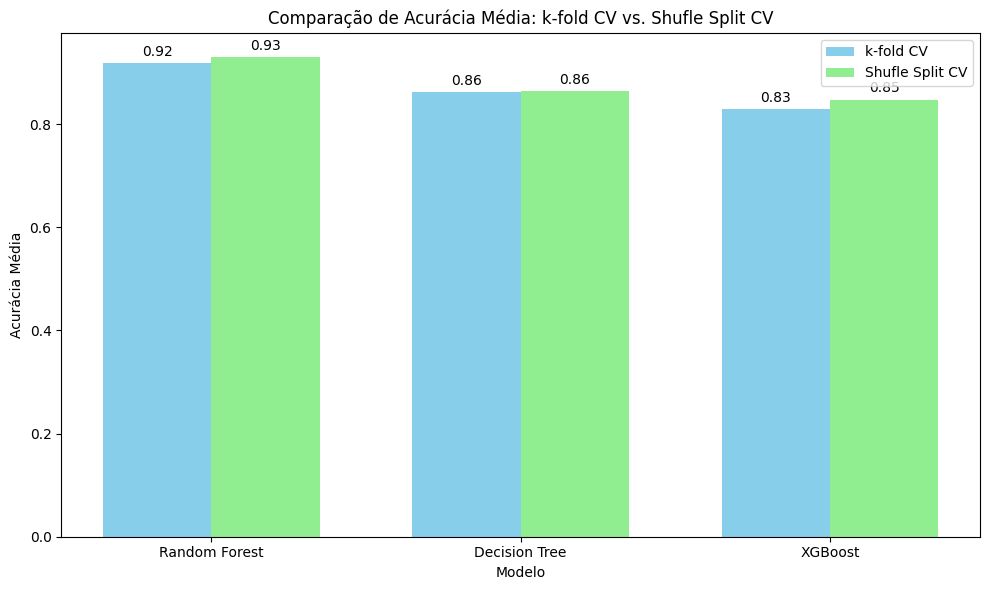

In [24]:
#Adicionar "svm_cv_scores.mean()" nas duas linhas abaixo e os rotulos afim de utilizar o SVM
kfold_accuracies = [rf_cv_scores.mean(), dt_cv_scores.mean(), xgb_cv_scores.mean()]
ss_accuracies = [rf_ss_scores.mean(), dt_ss_scores.mean(), xgb_ss_scores.mean()]
labels = ['Random Forest', 'Decision Tree', 'XGBoost']

x = np.arange(len(labels))  # localização dos labels no eixo x
width = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, kfold_accuracies, width, label='k-fold CV', color='skyblue')
rects2 = ax.bar(x + width/2, ss_accuracies, width, label='Shufle Split CV', color='lightgreen')

# Adicionar rótulos, título e legendas personalizadas
ax.set_xlabel('Modelo')
ax.set_ylabel('Acurácia Média')
ax.set_title('Comparação de Acurácia Média: k-fold CV vs. Shufle Split CV')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Função para adicionar rótulos de dados em cima das barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # deslocamento vertical dos rótulos
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

### Gráfico que compara métricas (f1, recall, accuracies)

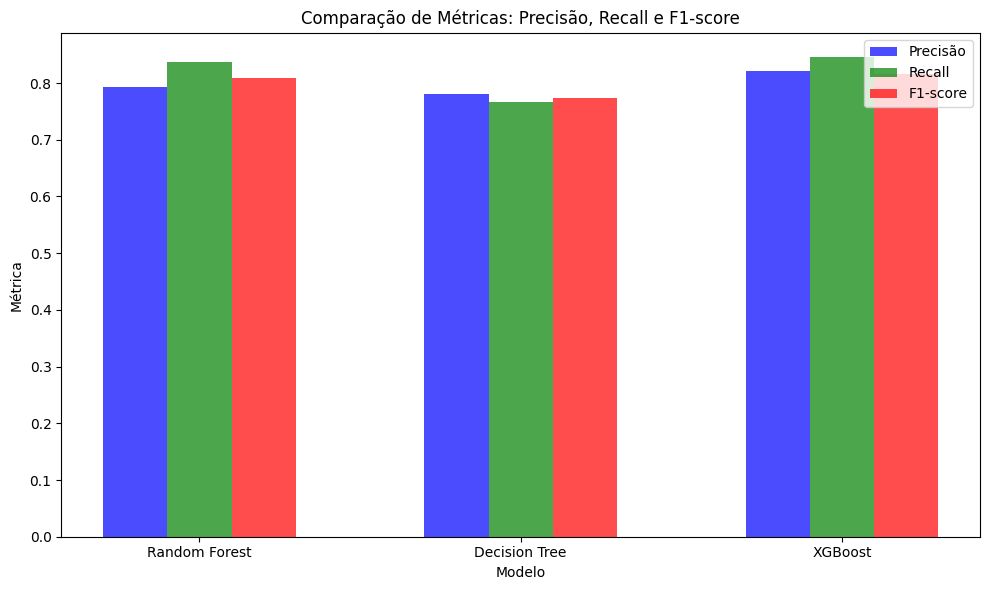

In [25]:
# Métricas para cada modelo
accuracies = [rf_precision, dt_precision, xgb_precision]
recalls = [rf_recall, dt_recall, xgb_recall]
f1_scores = [rf_f1, dt_f1, xgb_f1]
labels = ['Random Forest', 'Decision Tree', 'XGBoost']

# Configurações do gráfico
x = np.arange(len(labels))
width = 0.2

# Criar as barras
plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracies, width, label='Precisão', color='b', alpha=0.7)
plt.bar(x, recalls, width, label='Recall', color='g', alpha=0.7)
plt.bar(x + width, f1_scores, width, label='F1-score', color='r', alpha=0.7)

# Configurar eixos e rótulos
plt.xlabel('Modelo')
plt.ylabel('Métrica')
plt.title('Comparação de Métricas: Precisão, Recall e F1-score')
plt.xticks(x, labels)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

## Calcular a importância das features nos modelos mais importantes

### Calcular a importância das features do Random Forest

In [26]:
# Obter a importância das features do Random Forest
feature_importance_rf = rf_clf.feature_importances_

# Criar um DataFrame com as importâncias e os nomes das features
importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})

# Ordenar as features pela importância
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Imprimir as 10 features mais importantes
print(importance_df_rf.head(10))

      Feature  Importance
3         BMI    0.112900
13    GenHlth    0.099018
18        Age    0.096214
0      HighBP    0.092469
20     Income    0.075575
1    HighChol    0.073827
19  Education    0.059732
15   PhysHlth    0.048732
17        Sex    0.044732
4      Smoker    0.043157


### Calcular a importância das features do XGBoost

In [27]:
# Obter a importância das features do Random Forest
feature_importance_xgb = xgb_clf.feature_importances_

# Criar um DataFrame com as importâncias e os nomes das features
importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_xgb})

# Ordenar as features pela importância
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Imprimir as 10 features mais importantes
print(importance_df_xgb.head(10))

                 Feature  Importance
0                 HighBP    0.198543
1               HighChol    0.118974
13               GenHlth    0.068545
17                   Sex    0.066399
4                 Smoker    0.059789
8                 Fruits    0.057853
7           PhysActivity    0.057667
9                Veggies    0.045534
19             Education    0.040669
6   HeartDiseaseorAttack    0.040032


### Gráfico de comparação das features no Random Forest

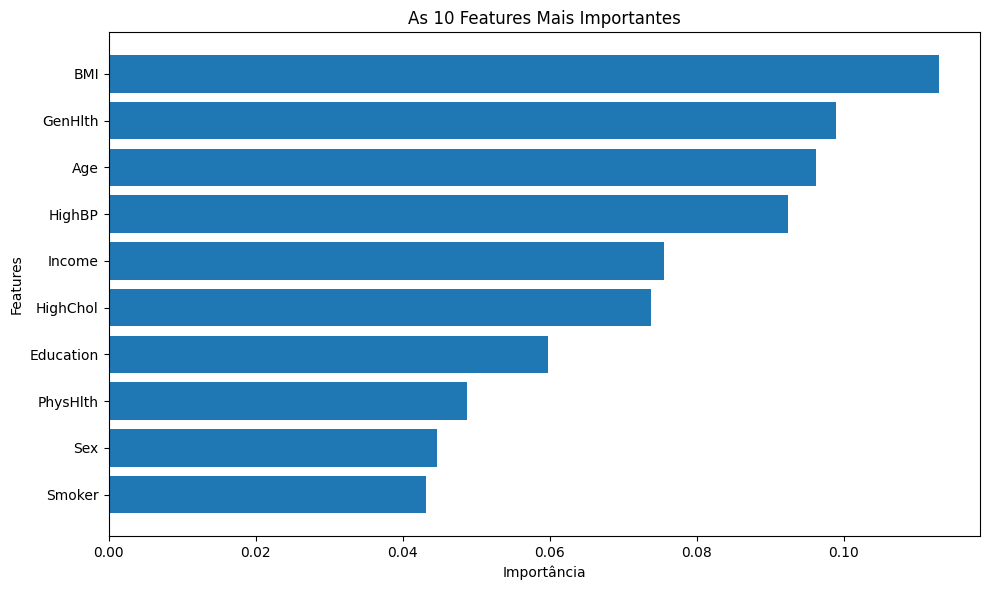

In [28]:
# Dados das 10 features mais importantes
top_features = importance_df_rf.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('As 10 Features Mais Importantes')
plt.gca().invert_yaxis()  # Inverter a ordem das features
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Gráfico de comparação das features no XGBoost

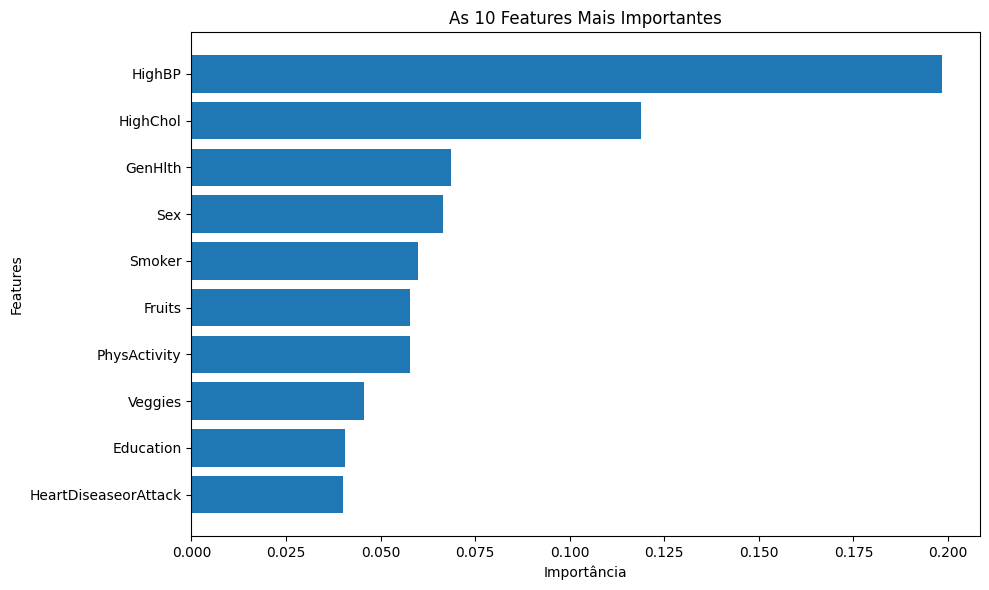

In [29]:
# Dados das 10 features mais importantes
top_features = importance_df_xgb.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('As 10 Features Mais Importantes')
plt.gca().invert_yaxis()  # Inverter a ordem das features
plt.tight_layout()

# Exibir o gráfico
plt.show()